In [23]:
import requests
import zipfile
import io # Python 2, use StringIO
import pandas as pd
import matplotlib

# Set the number of columns to be displayed when printing DataFrames
pd.set_option('max_columns', 7)

# Download file from ipfs
ipfs_file_url = "https://ipfs.io/ipfs/QmW7aSLjePW7S8uE5zbAneGAPdrzdA3MpFkTiFPrRsKS8t"
response = requests.get(ipfs_file_url, stream=True)

In [24]:
# The file is a zipfile to let's read it and parse the csv inside
zf = zipfile.ZipFile(io.BytesIO(response.content)) # Python 2, use StringIO.StringIO
df = pd.read_csv(zf.open('DB_20170627_to_20180627.csv'))

In [25]:
# Oookay, let's begin!
print(df)

           Date       Open       High        Low      Close  Adj Close    Volume
0    2017-06-26  16.879999  17.020000  16.799999  16.879999  16.702242   2991700
1    2017-06-27  17.410000  17.639999  17.360001  17.510000  17.325609   5388300
2    2017-06-28  17.620001  17.940001  17.620001  17.910000  17.721397   5763000
3    2017-06-29  18.430000  18.469999  17.889999  18.070000  17.879711   7194400
4    2017-06-30  18.129999  18.160000  17.680000  17.790001  17.602661   4101600
5    2017-07-03  18.170000  18.290001  18.080000  18.150000  17.958870   3012100
6    2017-07-05  18.670000  18.680000  18.420000  18.629999  18.433815   4733900
7    2017-07-06  18.889999  19.129999  18.850000  18.889999  18.691076   5356200
8    2017-07-07  19.000000  19.090000  18.900000  19.049999  18.849392   4585700
9    2017-07-10  18.860001  19.030001  18.830000  18.969999  18.770233   2483600
10   2017-07-11  19.049999  19.090000  18.910000  19.070000  18.869181   2537100
11   2017-07-12  18.730000  

In [123]:
# Calculating a few means (averages) with exponential components (com = center of mass), as done in Pandas >0.17 
# on the closing price of the Deutche Bank stock.

# New DataFrame to keep it clean
output = pd.DataFrame()
output['Date'] = df['Date']
output['ewma_com10'] = df['Close'].ewm(com=10).mean()
output['ewma_com50'] = df['Close'].ewm(com=50).mean()
output['ewma_com100'] = df['Close'].ewm(com=100).mean()

In [124]:
print(output)

           Date  ewma_com10  ewma_com50  ewma_com100
0    2017-06-26   16.879999   16.879999    16.879999
1    2017-06-27   17.210000   17.198118    17.196567
2    2017-06-28   17.465891   17.440126    17.436748
3    2017-06-29   17.639144   17.602303    17.597432
4    2017-06-30   17.675322   17.641344    17.636716
5    2017-07-03   17.774404   17.730371    17.724405
6    2017-07-05   17.934171   17.866649    17.857669
7    2017-07-06   18.097047   18.003607    17.991249
8    2017-07-07   18.247476   18.129293    18.113624
9    2017-07-10   18.354373   18.221050    18.203147
10   2017-07-11   18.454537   18.306093    18.285930
11   2017-07-12   18.501963   18.352808    18.332032
12   2017-07-13   18.556744   18.402672    18.380826
13   2017-07-14   18.594167   18.439708    18.417310
14   2017-07-17   18.617574   18.466435    18.443924
15   2017-07-18   18.603912   18.468859    18.447696
16   2017-07-19   18.578536   18.462763    18.443389
17   2017-07-20   18.565396   18.462582    18.

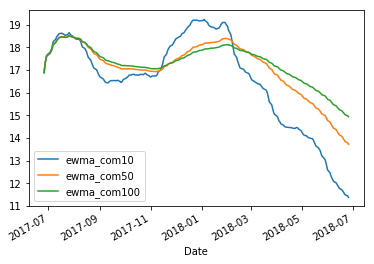

In [125]:
output.index = pd.to_datetime(output['Date'], format='%Y-%m-%d')
output.plot()